# 统计相关知识

## 一、均值 average

均值是一组数据中所有数据之和除以数据的总个数。它是描述数据集中心位置的一个重要统计量。均值可以帮助我们了解数据的集中趋势。通常来说，均值越大，数据越集中在均值周围，反之则数据越分散。

$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$$

## 二、标准差 std
标准差是用来衡量数据集合中数据分布的离散程度的一种常用指标。在统计学和数据分析中，标准差被广泛用于描述一个数据集合的离散程度，它表示每个数据点相对于平均值的偏离程度。

具体来说，标准差的计算公式为数据集合中每个数据点与平均值之差的平方的平均值的平方根。标准差越大，表示数据点相对于平均值的偏离程度越大，数据分布的离散程度越大；标准差越小，表示数据点相对于平均值的偏离程度越小，数据分布的离散程度越小。

在实际应用中，标准差常常与均值一起使用，例如在正态分布中，均值和标准差可以完全描述分布的特征。标准差也常常被用来进行数据的预处理和异常值检测。如果一个数据点与均值的偏离程度大于2倍的标准差，就可以认为该数据点是异常值，需要进行特殊处理或排除。

$$ \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2} $$
其中，$\sigma$表示标准差，$N$表示数据个数，$x_i$表示第$i$个数据，$\mu$表示数据的均值。

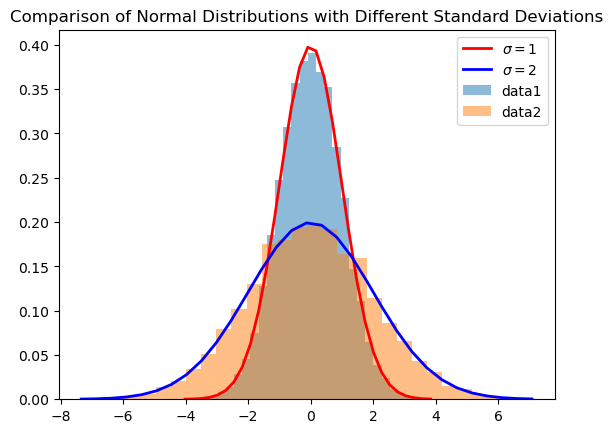

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# 生成10000个均值为0，标准差为1的正态分布随机数
mu, sigma = 0, 1  # 均值和标准差
data1 = np.random.normal(mu, sigma, 10000)

# 生成10000个均值为0，标准差为2的正态分布随机数
sigma = 2  # 新的标准差
data2 = np.random.normal(mu, sigma, 10000)

# 绘制数据的概率密度函数
count1, bins1, ignored1 = plt.hist(data1, 30, density=True, alpha=0.5)
count2, bins2, ignored2 = plt.hist(data2, 30, density=True, alpha=0.5)

# 绘制概率密度函数曲线
plt.plot(bins1, 1 / (1 * np.sqrt(2 * np.pi)) *
         np.exp(- (bins1 - mu) ** 2 / (2 * 1 ** 2)),
         linewidth=2, color='r')
plt.plot(bins2, 1 / (2 * np.sqrt(2 * np.pi)) *
         np.exp(- (bins2 - mu) ** 2 / (2 * 2 ** 2)),
         linewidth=2, color='b')

# 添加图例和标题
plt.legend(['$\sigma=1$', '$\sigma=2$', 'data1', 'data2'])
plt.title('Comparison of Normal Distributions with Different Standard Deviations')

plt.show()

## 三、协方差
协方差是用于衡量两个变量之间线性关系强度的一种统计量。如果两个变量变化趋势相同，则它们的协方差为正数；如果一个变量增加而另一个变量减少，则它们的协方差为负数；如果两个变量是独立的，则它们的协方差为零。
$$ \operatorname{cov}(X,Y)=\operatorname{E}[(X-\mu_X)(Y-\mu_Y)] $$
其中，$\operatorname{cov}(X,Y)$表示$X$和$Y$的协方差，$\operatorname{E}$表示期望值，$\mu_X$表示$X$的均值，$\mu_Y$表示$Y$的均值。

### 3.1 协方差矩阵
协方差矩阵是用于衡量多个变量之间线性关系强度的一种统计量。协方差矩阵是一个方阵，它的对角线元素是各个变量的方差，非对角线元素是各个变量之间的协方差。
$$ \operatorname{cov}(X,Y)=\begin{bmatrix} \operatorname{cov}(X,X) & \operatorname{cov}(X,Y) \\ \operatorname{cov}(Y,X) & \operatorname{cov}(Y,Y) \end{bmatrix} $$
其中，$\operatorname{cov}(X,X)$表示$X$的方差，$\operatorname{cov}(X,Y)$表示$X$和$Y$的协方差，$\operatorname{cov}(Y,Y)$表示$Y$的方差。

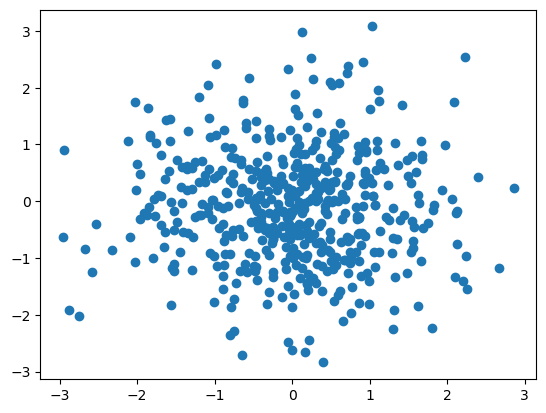

np.cov: [[ 1.01934676 -0.00791875]
 [-0.00791875  0.98695934]]
covx: 1.0173080663899003
covy: 0.984985418812651
covxy: -0.007902916411149988
coefxy: [[ 1.         -0.00789489]
 [-0.00789489  1.        ]]


In [51]:
import numpy as np
import matplotlib.pyplot as plt

# 生成指定均值和标准差的正态分布随机数
# 默认为numpy.random.normal(loc=0.0, scale=1.0, size=None)
# 生成N个均值为0，标准差为1的正态分布随机数
x = np.random.normal(size=500)
y = np.random.normal(size=500)

# 计算平均值
mx = x.mean()
my = y.mean()

# 计算标准差
stdx = x.std()
stdy = y.std()

# 计算协方差矩阵
covxy = np.cov(x, y)
plt.scatter(x, y)
plt.show()
print('np.cov:', covxy)

# 我们可以手动进行验证
# covx等于covxy[0, 0], covy等于covxy[1, 1]
# 我们这里的计算结果应该是约等于，因为我们在计算的时候是使用的总体方差(总体方差和样本方差是稍微有点区别的)
covx = np.mean((x - x.mean()) ** 2)
covy = np.mean((y - y.mean()) ** 2)
print('covx:', covx)
print('covy:', covy)
# 这里计算的covxy等于上面的covxy[0, 1]和covxy[1, 0]，三者相等
covxy = np.mean((x - x.mean()) * (y - y.mean()))
print('covxy:', covxy)

# 下面计算的是相关系数矩阵(和上面的协方差矩阵是类似的)
coefxy = np.corrcoef(x, y)
print('coefxy:', coefxy)

#### 补充：期望和方差
期望值和均值是两个相关但不完全相同的概念。

在概率论和统计学中，期望值是一个随机变量的预期值。它是在所有可能的随机结果上的平均值，每个结果的概率根据其概率权重进行加权。换句话说，期望值是对一个随机变量取值的长期平均值的度量。对于离散型随机变量，期望值可以表示为所有可能取值的概率与取值本身的乘积的总和；对于连续型随机变量，期望值可以表示为概率密度函数与变量本身的积的总积分。期望值常常用来描述一个概率分布的中心位置。

而均值则是一组数据的所有数据之和除以数据的总个数。均值是一种描述数据集中心位置的统计量，通常用来度量数据集的集中趋势。对于一组离散型数据，均值可以表示为所有数据之和除以数据的个数；对于一组连续型数据，均值可以表示为概率密度函数与自变量的积在整个定义域上的积分。均值是一个数据集的重要统计量，可以用来描述数据的中心位置。

因此，期望值和均值虽然有些相似，但是在概念上有一定的差别。在一些情况下，它们可以互相转换，但在其他情况下，它们的定义是不同的。

### 3.2 协方差的区别
总体协方差是指对于一个总体数据集，计算其中两个变量之间的协方差。总体协方差可以用以下公式计算：

$$ \operatorname{cov}(X,Y)=\frac{1}{N}\sum_{i=1}^N (x_i - \mu_X)(y_i - \mu_Y) $$

其中，$\operatorname{cov}(X,Y)$表示$X$和$Y$的总体协方差，$N$表示总体数据集的大小，$x_i$和$y_i$表示总体数据集中的第$i$个$X$和$Y$的取值，$\mu_X$和$\mu_Y$表示$X$和$Y$的总体均值。

而样本协方差则是指对于一个样本数据集，计算其中两个变量之间的协方差。样本协方差可以用以下公式计算：

$$ \operatorname{cov}(X,Y)=\frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) $$

其中，$\operatorname{cov}(X,Y)$表示$X$和$Y$的样本协方差，$n$表示样本数据集的大小，$x_i$和$y_i$表示样本数据集中的第$i$个$X$和$Y$的取值，$\bar{x}$和$\bar{y}$表示$X$和$Y$的样本均值。

### 3.3 无偏估计：样本协方差分母为$n-1$
样本协方差的分母为$n-1$是因为样本方差的计算中使用了$n-1$作为分母，而样本协方差是样本方差的一个无偏估计量，因此也采用了$n-1$作为分母。

为了更好地理解为何样本协方差的分母为$n-1$，可以考虑以下情况：

假设我们有一个样本数据集，其大小为$n$。我们可以计算样本的均值$\bar{x}$和方差$s_x^2$，分别用以下公式计算：

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

$$ s_x^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

其中，$x_i$表示样本数据集中的第$i$个数据点。

可以证明，$s_x^2$是样本方差的一个无偏估计量。也就是说，$s_x^2$的期望值等于样本方差的真实值。这个结论可以通过统计学的知识证明，这里不再详细说明。

现在假设我们已经计算出了两个变量$X$和$Y$的样本均值$\bar{x}$和$\bar{y}$，以及它们的协方差$s_{xy}$。如果我们将样本协方差的分母改为$n$而不是$n-1$，那么计算出来的协方差$s_{xy}$就不再是总体协方差$\operatorname{cov}(X,Y)$的无偏估计量。

具体来说，如果我们使用$n$作为分母来计算协方差，那么计算出来的协方差$s_{xy}$会比总体协方差$\operatorname{cov}(X,Y)$要小。这是因为在样本数据集中，存在一些自由度的损失。在计算样本方差时，分母为$n-1$是为了消除这种自由度的损失。同样，在计算协方差时，也需要消除自由度的损失，因此样本协方差的分母应该是$n-1$。

因此，使用$n-1$作为分母可以更准确地估计总体方差和协方差。这种方法被称为Bessel校正。

下面是无偏估计的一个推导：

假设有两个随机变量X和Y，它们的真实协方差为3，我们生成一个样本数据集来估计它们的协方差，并将该样本数据集的大小设置为10。我们首先使用numpy的random模块生成两个随机变量的样本数据，然后计算样本协方差，以及样本协方差分母为n-1的情况。

In [52]:
import numpy as np

# 生成X和Y两个随机变量
X = np.random.normal(0, 1, 1000000)
Y = np.random.normal(0, 1, 1000000)

# 计算样本协方差
sample_cov = np.cov(X, Y, bias=True)[0, 1]

# 计算样本协方差（分母为n-1）
sample_cov_unbiased = np.cov(X, Y, bias=False)[0, 1] * (100000 - 1) / 100000

# 计算样本均值
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# 计算协方差
true_cov = np.mean((X - X_mean) * (Y - Y_mean))

# 输出结果
print("真实协方差为：", true_cov)
print("样本协方差为：", sample_cov)
print("样本协方差（分母为n-1）为：", sample_cov_unbiased)
print("样本协方差与真实协方差的误差为：", sample_cov - true_cov)
print("样本协方差（分母为n-1）与真实协方差的误差为：", sample_cov_unbiased - true_cov)

真实协方差为： 0.0001237622273210635
样本协方差为： 0.00012376222732106415
样本协方差（分母为n-1）为： 0.00012376111345990438
样本协方差与真实协方差的误差为： 6.505213034913027e-19
样本协方差（分母为n-1）与真实协方差的误差为： -1.1138611591236802e-09
